# Perform Exploratory Data Analysis (EDA)  on Cars dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#pd.pandas.set_option('display.max_columns', None)
#pd.pandas.set_option('display.max_rows', None)

In [17]:
url=input()
df=pd.read_csv(url)
df.head(5)

cars_sampled.csv


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [19]:
df.shape

(50001, 19)

In [20]:
df.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

## handling missing values

In [21]:
df.vehicleType.isna().value_counts()

False    44813
True      5188
Name: vehicleType, dtype: int64

In [22]:
df.vehicleType.mode().iloc[0]

'limousine'

In [23]:
df.vehicleType.fillna(df.vehicleType.mode().iloc[0],inplace=True)

In [24]:
df.vehicleType.isna().value_counts()

False    50001
Name: vehicleType, dtype: int64

In [25]:
df.gearbox.isna().value_counts()

False    47177
True      2824
Name: gearbox, dtype: int64

In [26]:
df.gearbox.mode().iloc[0]

'manual'

In [27]:
df.gearbox.fillna(df.gearbox.mode().iloc[0],inplace=True)

In [28]:
df.gearbox.isna().value_counts()

False    50001
Name: gearbox, dtype: int64

In [29]:
df.model.mode().iloc[0]
df.model.fillna(df.model.mode().iloc[0],inplace=True)
df.model.isna().value_counts()

False    50001
Name: model, dtype: int64

In [30]:
df.fuelType.fillna(df.fuelType.mode().iloc[0],inplace=True)
df.fuelType.isna().value_counts()

False    50001
Name: fuelType, dtype: int64

In [31]:
df.notRepairedDamage.fillna(df.notRepairedDamage.mode().iloc[0],inplace=True)
df.notRepairedDamage.isna().value_counts()

False    50001
Name: notRepairedDamage, dtype: int64

In [32]:
df.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
price,1.000000,0.017604,0.020429,-0.045458,0.000582,0.005916
yearOfRegistration,0.017604,1.000000,-0.004394,-0.064188,-0.023152,-0.001615
powerPS,0.020429,-0.004394,1.000000,-0.016447,0.034345,0.017415
kilometer,-0.045458,-0.064188,-0.016447,1.000000,0.001985,-0.024076
monthOfRegistration,0.000582,-0.023152,0.034345,0.001985,1.000000,0.019050
postalCode,0.005916,-0.001615,0.017415,-0.024076,0.019050,1.000000


<AxesSubplot:>

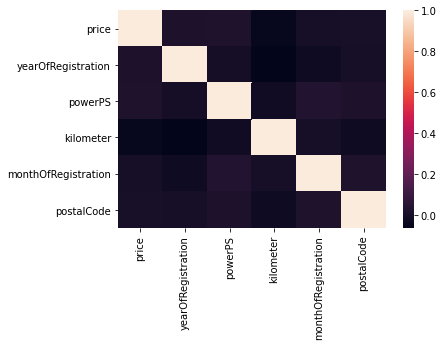

In [34]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='kilometer'>

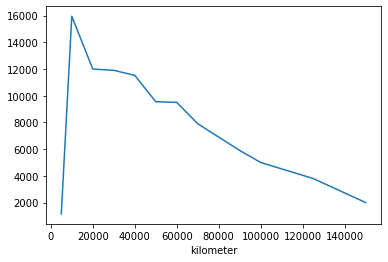

In [35]:
df.groupby("kilometer")["price"].median().plot()

<AxesSubplot:xlabel='price'>

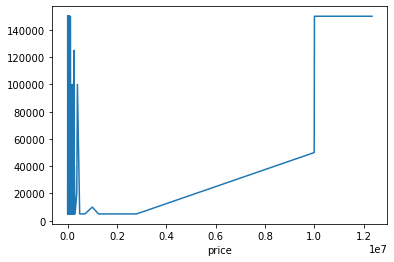

In [36]:
df.groupby("price")["kilometer"].median().plot()

<AxesSubplot:xlabel='kilometer'>

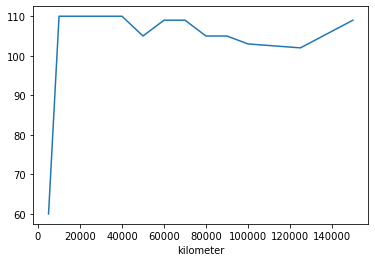

In [37]:
df.groupby("kilometer")["powerPS"].median().plot()

<AxesSubplot:xlabel='price'>

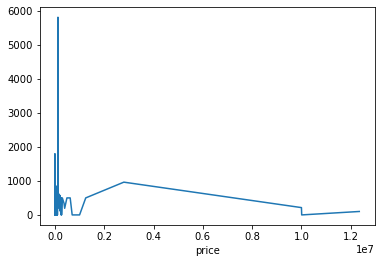

In [38]:
df.groupby("price")["powerPS"].median().plot()